In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

# Example One: Detectecting Whales

Let's imagine that we have a piece of equipment that detects whales acoustically. We know that:
- Our previous data collection suggests that there are whales in our study area 5\% of the time
- Our equipment will detect whales 99\% of the time \textbf{if there is a whale there} (if we miss a whale: Type II error, false negative). 
- Our equipment will detect a whale 10\% of the time \textbf{if there is no whale there} (if we detect a whale: Type I error, false positive).

We can summarize this information in terms of probabilities:

\begin{equation}
\mathbf{P} = 
\begin{cases}
  0.95 & \text{no whale} \begin{cases}
                              0.9 & \text{no detection} \\
                              0.1 & \text{detection} 
                              \end{cases} \\
  0.05 & \text{whale} \begin{cases}
                              0.01 & \text{no detection} \\
                              0.99 & \text{detection} 
                              \end{cases}
 \end{cases}
\end{equation}

We get a detection signal that tells us a whale is in our study area. What is the probability that its actually a whale?

Okay! What we want to do here is think about the joint probability:
\begin{equation}
\mathbf{P}(\text{whale} | \text{detection}) = \frac{\mathbf{P} (\text{whale} \cap \text{detection})}{\mathbf{P}(\text{detection})}
\end{equation}

Let's start with the probability that *there is a whale* AND *the whale is detected* 
\begin{equation}
\mathbf{P} (\text{whale} \cap \text{detection}) = \mathbf{P}(whale)\mathbf{P}(whale|detection) 
\end{equation}

We know that the probability that there is a whale is 0.05, and the probability that the whale is detected, given that there is a whale, is 0.99, so:
\begin{equation}
\mathbf{P} (\text{whale} \cap \text{detection}) = (0.05)(0.99)
\end{equation}

Now, lets calculate the probability that *any* detection occurs. This is going to be the sum of the probability that (1) a whale is present and a whale is detected, and (2) a whale is not present and a whale is detected. 
\begin{equation}
\mathbf{P} (\text{detection}) = (0.05)(0.99) + (0.95)(0.1)
\end{equation}

Putting it all together: 
\begin{equation}
\mathbf{P} (\text{whale} \cap \text{detection}) = \frac{(0.05)(0.99)}{(0.05)(0.99)+(0.95)(0.1)} = 0.34 
\end{equation}

# Example Two: Examining Distributions

Let's look at two tidal time series. The file I've provided has sea level data from two sites in Tracadie, New Brunswick. Let's think about the following questions: 
- Based on physics/climatology, what do we expect about these two datasets? 
- What are the general statistics of this dataset? 
- How are they similar/how are they different?

In [2]:
# Read in our data
tides = pd.read_csv('tracadie_tides.txt',names = ['ile_cheval','tracadie_bch'], sep = '\s+')

### First, lets plot the data in two formats: time series and histogram to see what we can see!  

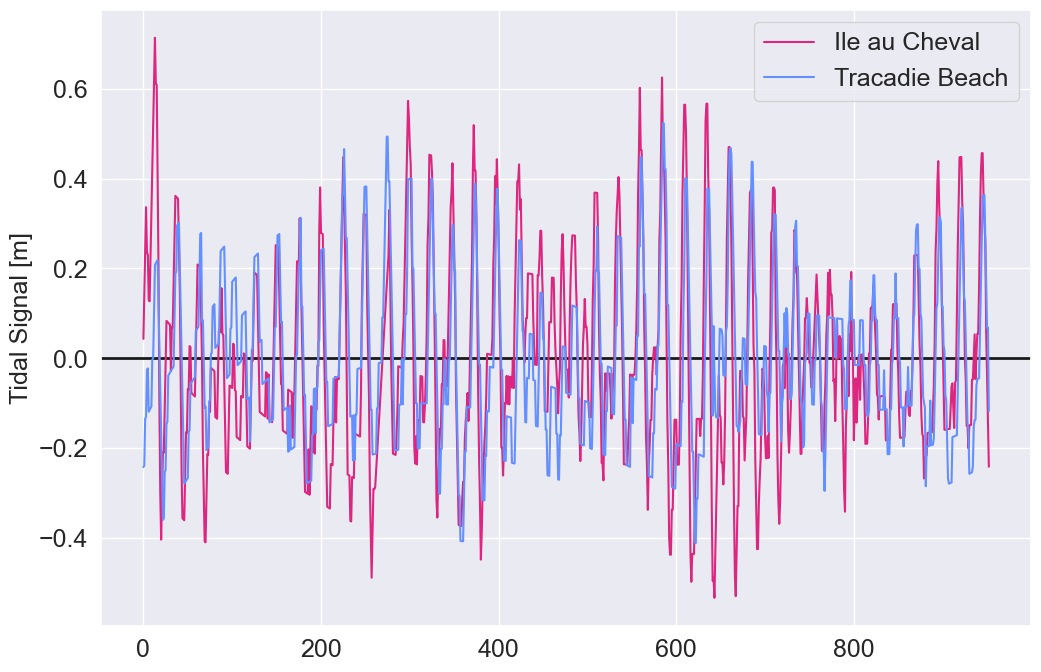

In [3]:
fig   = plt.figure(figsize=(12, 8))

zline = plt.axhline(0, color='k', linewidth=2)
il_ch = plt.plot(tides['ile_cheval'], color='#dc267f', linewidth=1.5, label='Ile au Cheval')
tr_bc = plt.plot(tides['tracadie_bch'], color='#648fff', linewidth=1.5, label='Tracadie Beach')

leg   = plt.legend(fontsize=18)
ylab  = plt.ylabel('Tidal Signal [m]', fontsize=18)
xtix  = plt.yticks(fontsize=18)
ytix  = plt.xticks(fontsize=18)

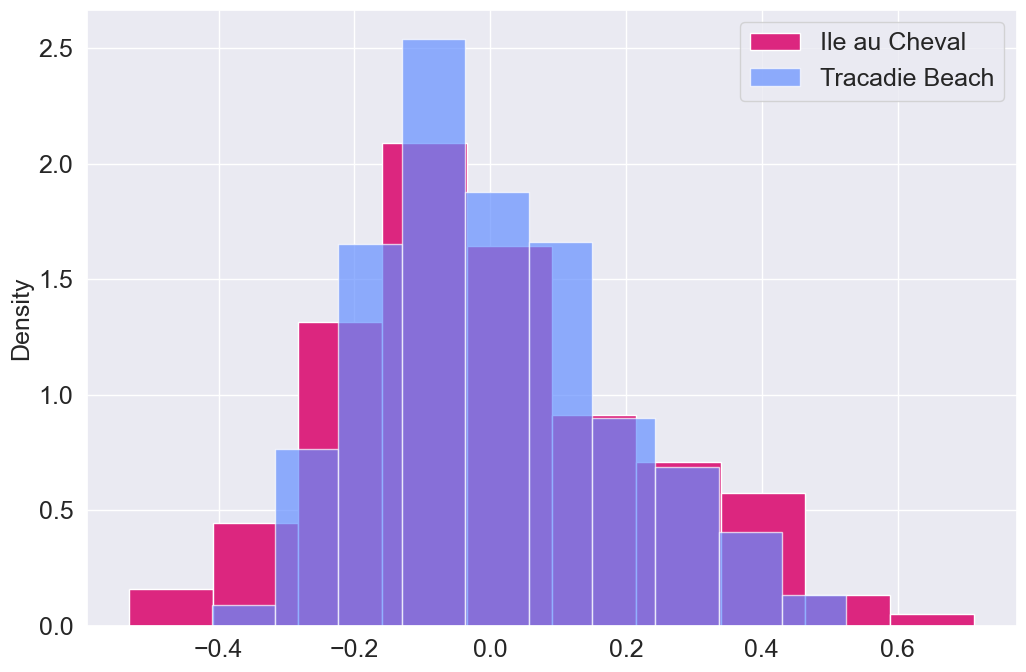

In [4]:
fig   = plt.figure(figsize=(12, 8))

il_ch = plt.hist(tides['ile_cheval'], color='#dc267f', density=True,label='Ile au Cheval')
tr_bc = plt.hist(tides['tracadie_bch'], color='#648fff', density=True, label='Tracadie Beach',alpha = 0.7)

leg   = plt.legend(fontsize=18)
ylab  = plt.ylabel('Density', fontsize=18)
xtix  = plt.yticks(fontsize=18)
ytix  = plt.xticks(fontsize=18)

### Now, let's calculate the first four moments (mean, variance, skewness, and kurtosis) for each dataset

I like to define some of my own functions so I can see what's going on (and can reuse these easily!), but you can also use built in functions from packages like numpy and scipy

In [5]:
def mean(time_series):
    mean = sum(time_series)/len(time_series)
    return(mean)

def variance(time_series):
    var = sum((time_series - mean(time_series))**2)/(len(time_series)-1)
    return(var)

def skew(time_series):
    skew = mean((time_series - mean(time_series))**3)/(np.sqrt(variance(time_series)))
    return(skew)

def kurt(time_series):
    kurt = mean((time_series - mean(time_series))**4)/(np.sqrt(variance(time_series)))
    return(kurt)

In [6]:
mean_il_ch = mean(tides['ile_cheval']); var_il_ch  = variance(tides['ile_cheval'])
skew_il_ch = skew(tides['ile_cheval']); kurt_il_ch = kurt(tides['ile_cheval'])

mean_tr_bc = mean(tides['tracadie_bch']); var_tr_bc  = variance(tides['tracadie_bch'])
skew_tr_bc = skew(tides['tracadie_bch']); kurt_tr_bc = kurt(tides['tracadie_bch'])

print('Ile au Cheval: μ = ' + '%.3f' % mean_il_ch, '; σ^2 = ' + '%.3f' % var_il_ch, '; skew = ' + '%.3f' % skew_il_ch, '; kurtosis = ' + '%.3f' % kurt_il_ch)
print('Tracadie Beach: μ = ' + '%.3f' % mean_tr_bc, '; σ^2 = ' + '%.3f' % var_tr_bc, '; skew = ' + '%.3f' % skew_tr_bc, '; kurtosis = ' + '%.3f' % kurt_tr_bc)

Ile au Cheval: μ = -0.000 ; σ^2 = 0.049 ; skew = 0.022 ; kurtosis = 0.031
Tracadie Beach: μ = -0.000 ; σ^2 = 0.032 ; skew = 0.015 ; kurtosis = 0.016


### Okay! Now we're going to compare our time series with each other! 

Note: this calculation will compare variations at the **same time**. Our histogram does not preserve order, so if we repeated this calculation for a random variable with an identical distribution, we would most likely get a lower correlation, because they will not be related in time.

In [7]:
def covariance(x,y):
    cov = mean((x - mean(x))*(y - mean(y)))
    return cov

def correlation(x,y):
    corr = covariance(x,y)/(np.sqrt(variance(x))*np.sqrt(variance(y)))
    return corr

In [8]:
cov_il_tr  = covariance(tides['ile_cheval'],tides['tracadie_bch'])
corr_il_tr = correlation(tides['ile_cheval'],tides['tracadie_bch'])

print('cov = ' + '%.3f' % cov_il_tr, '; corr = ' + '%.3f' % corr_il_tr)

cov = 0.027 ; corr = 0.690


# Example Three: Hypothesis Testing

Using the same dataset as above, let's practice hypothesis testing. Imagine that we want to know whether the mean of the île au Cheval dataset is -0.1m (this seems like a reasonable guess, looking at our histogram). Start by setting up our null hypothesis and alternative hypothesis: 

*Null hypothesis*, $H_o$: The mean of the île au Cheval dataset is -0.1 m.  

*Alternative hypothesis*, $H_a$: The mean of the île au Cheval dataset is **greater than** -0.1 m.   

*Test*: upper-tailed t-test

Next we compute the t value 
$$t = \frac{\bar{x}-\mu_0}{\sigma / \sqrt{n}}$$

In [9]:
t_stat = (mean(tides['ile_cheval']) - (-0.1)) / (np.sqrt(variance(tides['ile_cheval']))/np.sqrt(len(tides['ile_cheval'])))

In [10]:
t_stat, p_value = stats.ttest_1samp(tides['ile_cheval'], popmean= -0.1, alternative='greater')

In [11]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the sample mean and the hypothesized population mean.")

Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.


# Example Four: Linear Trend 

Let's look at a new dataset, which has annual American Lobster landings (in pounds) from Maine. A quick look at the data shows us that the landings are increasing over time. Let's fit a linear trend to this data to quantify the change in landings over time.

In [12]:
# Load our data and do a little wrangling
lobster = pd.read_csv('lobster_landings_ne.csv', names= ['Year','Landings'])
lobster['Landings'] = lobster['Landings'].str.replace(',','')
lobster['Landings'] = pd.to_numeric(lobster['Landings'])

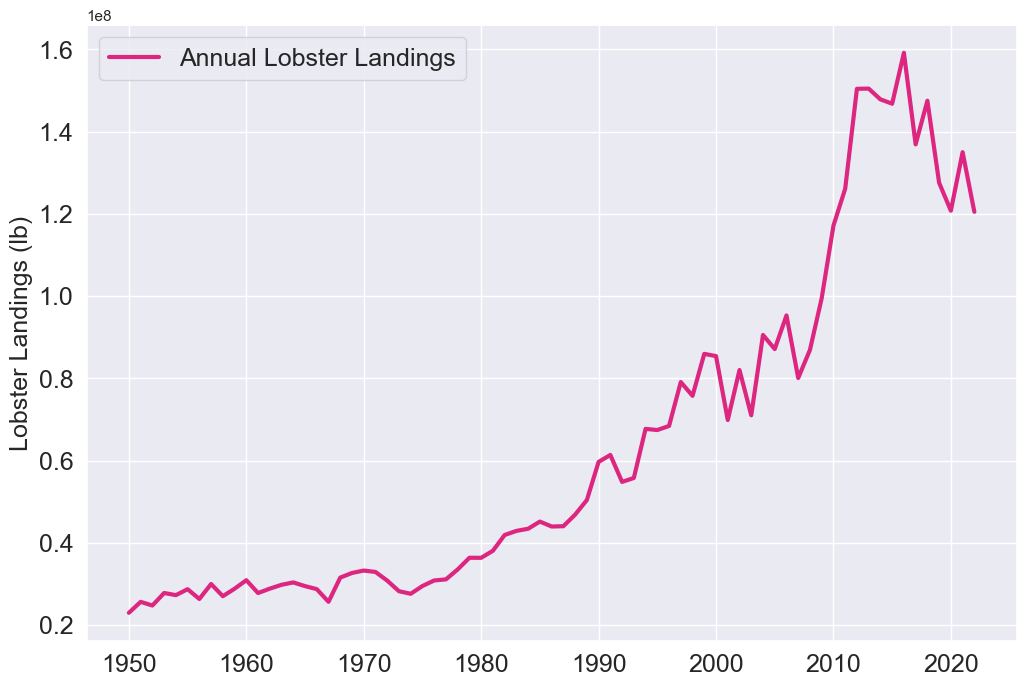

In [13]:
fig   = plt.figure(figsize=(12, 8))

lobs  = plt.plot(lobster['Year'],lobster['Landings'], color='#dc267f',linewidth=3,label='Annual Lobster Landings')

leg   = plt.legend(fontsize=18)
xlab  = plt.ylabel('Year', fontsize=18)
ylab  = plt.ylabel('Lobster Landings (lb)', fontsize=18)
xtix  = plt.yticks(fontsize=18)
ytix  = plt.xticks(fontsize=18)

### Let's start by calculating the **slope** of our linear trend

In [14]:
N = len(lobster)
x = lobster['Year']
y = lobster['Landings']

m = (N*sum(x*y) - sum(y)*sum(x))/(N*sum(x**2)-(sum(x)**2))

### That was fun! Let's calculate the intercept now! 

In [15]:
b = mean(y) - m*(mean(x))

print('The equation of our linear trend is given by: y = ' + '{:.2e}'.format(m) + 'x + (' + '{:.2e}'.format(b) +')')

The equation of our linear trend is given by: y = 1.74e+06x + (-3.39e+09)


### Okay... Now we're cooking with fire! Let's reconstruct our dataset using the x vector

In [16]:
y_hat = m*x + b

### We probably want to include some metric of error on this estimate. How do we do that? 

One easy way to calculate error of a linear regression is by computing the Mean Squared Error (MSE): 
$$MSE = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2$$
Let's calculate this metric for our data and put some error bars on our estimate!

In [17]:
mse = (1/N)*sum((y - y_hat)**2)
print('The MSE of our linear regression fit is ' + '{:.2e}'.format(mse))

The MSE of our linear regression fit is 2.92e+14


Another metric you're probably familiar with is the R value, which is the **sample correlation coefficient** of the data
$$ R = \frac{1}{N-1}\sum_i\Big[\frac{y_i - \bar{y}}{\sigma_y}\frac{\hat{y_i} - \hat{\bar{y}}}{\sigma_\hat{y}}\Big]$$

In [18]:
R = (1/(N-1))*sum((y - mean(y))/np.sqrt(variance(y))*(y_hat - mean(y_hat))/np.sqrt(variance(y_hat)))
print('The sample correlation coefficient (R) of our linear regression fit is = ' + '%.3f' % R)

The sample correlation coefficient (R) of our linear regression fit is = 0.906


### Lets take a look at our big success!

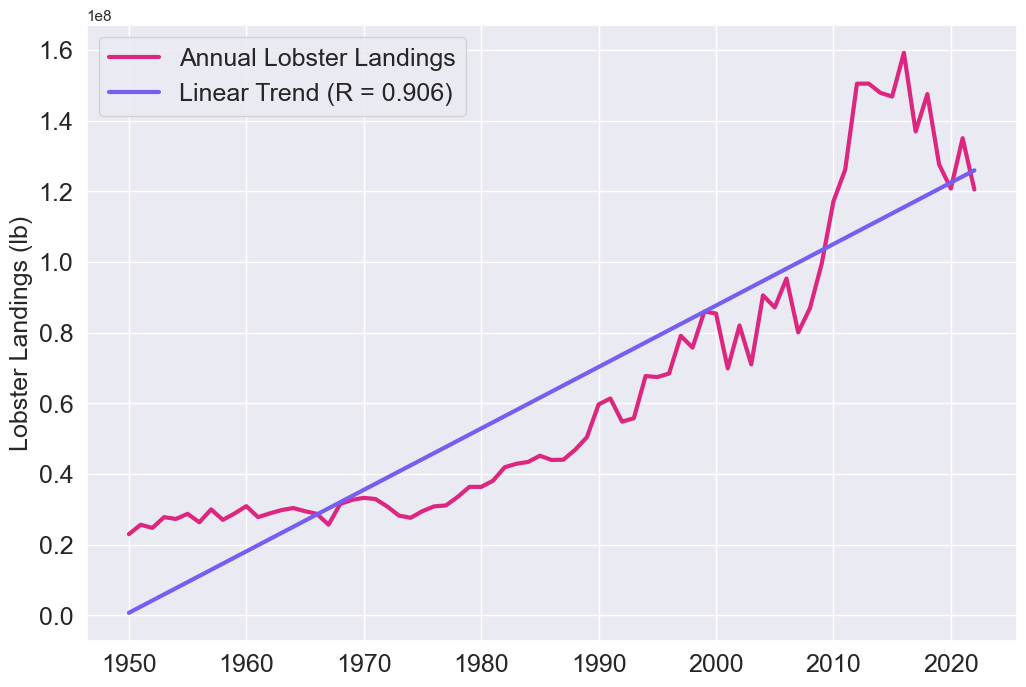

In [19]:
fig   = plt.figure(figsize=(12, 8))

lobs  = plt.plot(lobster['Year'],lobster['Landings'], color='#dc267f',linewidth=3,label='Annual Lobster Landings')
lin   = plt.plot(lobster['Year'],y_hat, color='#785ef0',linewidth=3,label='Linear Trend (R = ' + '%.3f' % R + ')')

leg   = plt.legend(fontsize=18)
xlab  = plt.ylabel('Year', fontsize=18)
ylab  = plt.ylabel('Lobster Landings (lb)', fontsize=18)
xtix  = plt.yticks(fontsize=18)
ytix  = plt.xticks(fontsize=18)